# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

## mission



Which variable is the target ?

How many rows and columns ?

What is the correlation between the variables and the target ? (Why might that be?)

What is the correlation between the variables and the other variables ? (Why?)

Which variables have the greatest influence on the target ?

Which variables have the least influence on the target ?

How many qualitative and quantitative variables are there ? How would you transform these values into numerical values ?

Percentage of missing values per column ?

# import cleaned data


In [52]:
ds=pd.read_csv('cleaneddata1.csv',sep=',')
ds

,Unnamed: 0,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,...,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city,province,region
0,0,6800,HOUSE,HOUSE,295000,5,460,1,0,0,...,10.0,0,None,321.0,2,0,TO_BE_DONE_UP,Remagne,Luxembourg,Wallonia
1,1,6800,HOUSE,HOUSE,175000,3,172,0,0,0,...,None,1,1000.0,1254.0,4,0,TO_RENOVATE,Remagne,Luxembourg,Wallonia
2,2,6800,HOUSE,HOUSE,539000,5,596,1,0,1,...,38.0,1,1300.0,1500.0,4,0,AS_NEW,Remagne,Luxembourg,Wallonia
3,3,6800,APARTMENT,APARTMENT,154000,2,62,0,0,0,...,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
4,4,6800,APARTMENT,APARTMENT,179000,2,79,0,0,0,...,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,15646,4557,HOUSE,COUNTRY_COTTAGE,139000,2,81,1,0,0,...,None,1,350.0,443.0,3,0,TO_RENOVATE,Seny,Liege,Wallonia
15647,15647,9881,HOUSE,HOUSE,499000,6,274,1,0,0,...,None,1,None,1036.0,3,0,TO_RENOVATE,Bellem,East_Flanders,Flanders
15648,15648,6851,HOUSE,HOUSE,115000,4,160,0,0,0,...,None,1,None,1555.0,4,0,TO_RENOVATE,Nollevaux,Luxembourg,Wallonia
15649,15649,4342,HOUSE,HOUSE,210000,3,110,1,0,0,...,15.0,1,1200.0,1400.0,3,0,TO_BE_DONE_UP,Hognoul,Liege,Wallonia


In [54]:
ds.columns

Index(['Unnamed: 0', 'location', 'type', 'subtype', 'price', 'room_number',
       'area', 'kitchen_equipped', 'furnished', 'fireplace', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'land_surface', 'facade_count',
       'swimming_pool', 'building_condition', 'city', 'province', 'region'],
      dtype='object')

In [55]:
# delet the first column and rename the columns of 'location' to postal_code

del ds["Unnamed: 0"]

ds.rename(columns={'location': 'postal_code'}, inplace=True)

In [56]:
ds

,postal_code,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city,province,region
0,6800,HOUSE,HOUSE,295000,5,460,1,0,0,1,10.0,0,None,321.0,2,0,TO_BE_DONE_UP,Remagne,Luxembourg,Wallonia
1,6800,HOUSE,HOUSE,175000,3,172,0,0,0,1,None,1,1000.0,1254.0,4,0,TO_RENOVATE,Remagne,Luxembourg,Wallonia
2,6800,HOUSE,HOUSE,539000,5,596,1,0,1,1,38.0,1,1300.0,1500.0,4,0,AS_NEW,Remagne,Luxembourg,Wallonia
3,6800,APARTMENT,APARTMENT,154000,2,62,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
4,6800,APARTMENT,APARTMENT,179000,2,79,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,4557,HOUSE,COUNTRY_COTTAGE,139000,2,81,1,0,0,0,None,1,350.0,443.0,3,0,TO_RENOVATE,Seny,Liege,Wallonia
15647,9881,HOUSE,HOUSE,499000,6,274,1,0,0,0,None,1,None,1036.0,3,0,TO_RENOVATE,Bellem,East_Flanders,Flanders
15648,6851,HOUSE,HOUSE,115000,4,160,0,0,0,1,None,1,None,1555.0,4,0,TO_RENOVATE,Nollevaux,Luxembourg,Wallonia
15649,4342,HOUSE,HOUSE,210000,3,110,1,0,0,1,15.0,1,1200.0,1400.0,3,0,TO_BE_DONE_UP,Hognoul,Liege,Wallonia


## Which variable is the target ?

price (we want to creat a model to predict price.)

In [69]:
ds.price.mean()

473084.17034055333

In [70]:
ds.price.median()

319000.0

#### price outliner

<AxesSubplot:xlabel='price'>

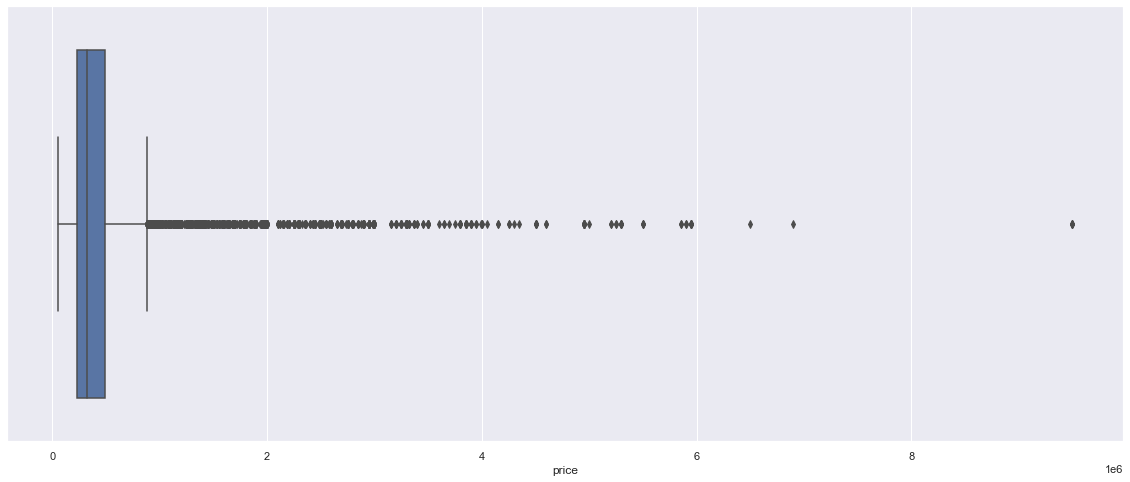

In [74]:
plt.figure(figsize=(20,8))
sns.boxplot(x="price", data=ds)

a lot of number of properties over 1000000 euros as outliers in the box plot.

## How many rows and columns ?

with our data cleaning process:

In [57]:
ds.shape

(15651, 20)

In [58]:
row=ds.shape[0]
columns=ds.shape[1]

In [59]:
print(f'row = {row} and columns = {columns}.')

row = 15651 and columns = 20.


In [60]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15651 entries, 0 to 15650
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   postal_code         15651 non-null  int64  
 1   type                15651 non-null  object 
 2   subtype             15651 non-null  object 
 3   price               15651 non-null  int64  
 4   room_number         15651 non-null  int64  
 5   area                15651 non-null  int64  
 6   kitchen_equipped    15651 non-null  int64  
 7   furnished           15651 non-null  int64  
 8   fireplace           15651 non-null  int64  
 9   terrace             15651 non-null  int64  
 10  terrace_area        15651 non-null  object 
 11  garden              15651 non-null  int64  
 12  garden_area         15651 non-null  object 
 13  land_surface        15651 non-null  float64
 14  facade_count        15651 non-null  int64  
 15  swimming_pool       15651 non-null  int64  
 16  buil

### What is the correlation between the variables and the target ? (Why might that be?)
### What is the correlation between the variables and the target ? (Why might that be?)

### What is the correlation between the variables and the other variables ? (Why?)

### Which variables have the greatest influence on the target ?

### Which variables have the least influence on the target ?

# correlation

In [63]:
ds.corr()

,postal_code,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,garden,land_surface,facade_count,swimming_pool
postal_code,1.000000,-0.159612,-0.029154,-0.057482,-0.130605,0.019330,-0.066888,-0.119945,0.060416,-0.012894,-0.122755,-0.071056
price,-0.159612,1.000000,0.420545,0.592532,0.025067,0.008907,0.137882,0.116823,0.057383,0.209073,0.161326,0.336337
room_number,-0.029154,0.420545,1.000000,0.630930,0.031293,-0.069802,0.179203,0.026175,0.252634,0.164820,0.245643,0.191976
area,-0.057482,0.592532,0.630930,1.000000,0.005359,-0.045688,0.192362,0.009394,0.180366,0.241506,0.238160,0.286746
kitchen_equipped,-0.130605,0.025067,0.031293,0.005359,1.000000,-0.004133,0.050074,0.141759,0.055695,0.001687,0.141460,0.045582
furnished,0.019330,0.008907,-0.069802,-0.045688,-0.004133,1.000000,-0.009283,-0.003035,-0.032134,-0.005863,-0.024914,-0.001320
fireplace,-0.066888,0.137882,0.179203,0.192362,0.050074,-0.009283,1.000000,0.006830,0.129930,0.043928,0.161903,0.116662
terrace,-0.119945,0.116823,0.026175,0.009394,0.141759,-0.003035,0.006830,1.000000,0.047256,0.005223,0.042297,0.071353
garden,0.060416,0.057383,0.252634,0.180366,0.055695,-0.032134,0.129930,0.047256,1.000000,0.021587,0.137041,0.070388
land_surface,-0.012894,0.209073,0.164820,0.241506,0.001687,-0.005863,0.043928,0.005223,0.021587,1.000000,0.051050,0.090318


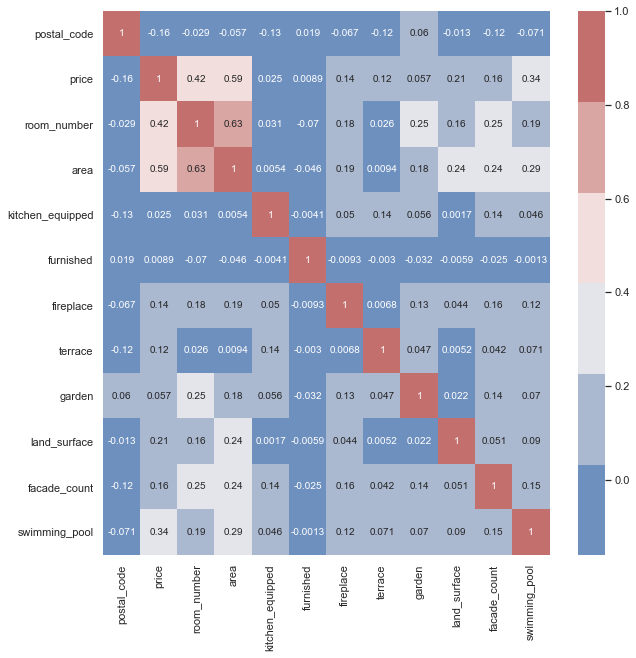

<Figure size 432x288 with 0 Axes>

In [64]:
fig,ax = plt.subplots(figsize=(10, 10)) 
plot=sns.heatmap(ds.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

 We can see that the price is related to the number of rooms and the area. 

#### correlation between type of property and room number

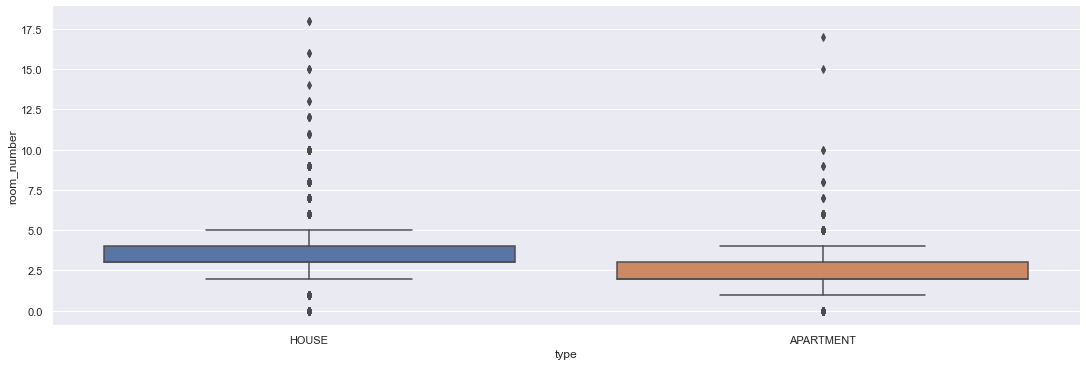

<Figure size 432x288 with 0 Axes>

In [75]:

plot = sns.catplot(x="type", y="room_number", kind="box", height=5, aspect=3, data=ds)
plt.show()

plt.savefig('type_roomnumber.png', dpi=300)

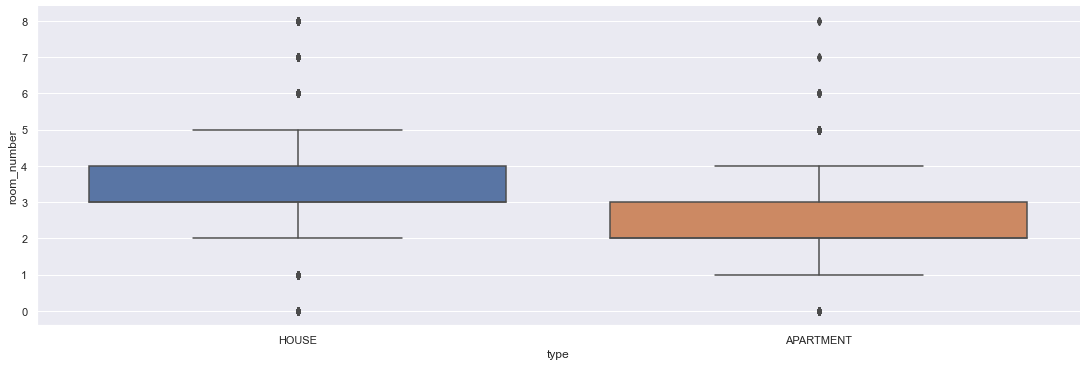

<Figure size 432x288 with 0 Axes>

In [67]:
# Remove outliers
ds1 = ds[(ds['room_number'] <= 8)]
plot = sns.catplot(x="type", y="room_number", kind="box", height=5, aspect=3, data=ds1)
plt.show()

plt.savefig('type_roomsnumber.svg', dpi=300)

we can see that generally, an apartment has between 1 and 4 rooms and a house has between 2 and 5 rooms.

### type_price  for regions

<ipython-input-189-64816a708bf3>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


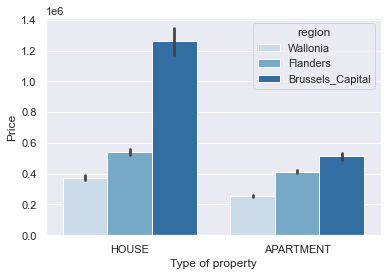

In [189]:
sns.barplot(x="type", y="price", data=ds, hue="region", palette="Blues")
ax = plt.subplot()
ax = ax.set_xticklabels(["HOUSE", "APARTMENT"])
plt.xlabel("Type of property")
plt.ylabel("Price")
plt.savefig("price_type_region.png", bbox_inches="tight")

#### type_price for province

<ipython-input-77-7dfc325cee10>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


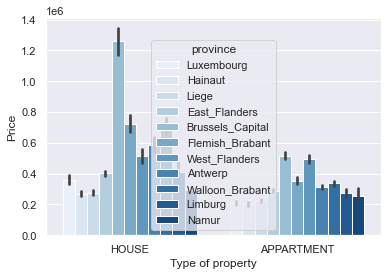

In [77]:
sns.barplot(x="type", y="price", data=ds, hue="province", palette="Blues")
ax = plt.subplot()
ax = ax.set_xticklabels(["HOUSE", "APPARTMENT"])
plt.xlabel("Type of property")
plt.ylabel("Price")
plt.savefig("price_type_region.png", bbox_inches="tight")

#### price for province

Text(0, 0.5, 'Price')

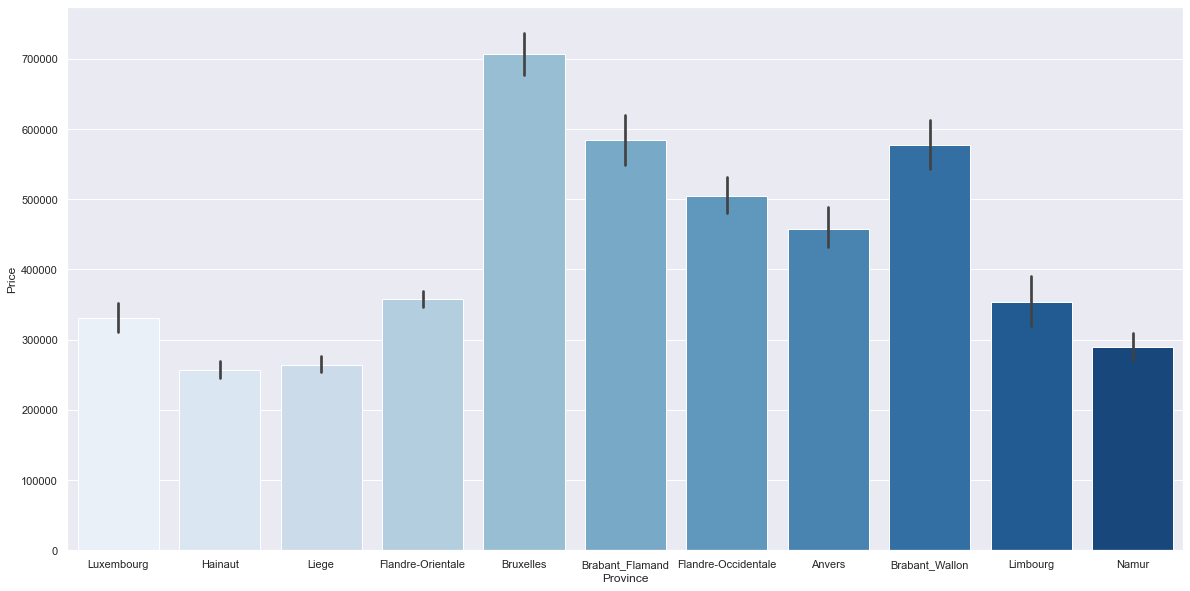

In [23]:
plt.figure(figsize=(20, 10))
sns.barplot(x="province", y="price", data=ds, palette="Blues")
plt.xlabel("Province")
plt.ylabel("Price")

### price for different communes of Brussels_Capital

In [80]:
brussels = ds[ds["region"] == "Brussels_Capital"]
brussels

,postal_code,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city,province,region
167,1160,HOUSE,HOUSE,550000,3,150,0,0,1,1,10.0,1,100.0,141.0,2,0,TO_RENOVATE,Auderghem,Brussels_Capital,Brussels_Capital
168,1160,APARTMENT,PENTHOUSE,799000,3,164,1,0,0,1,20.0,0,None,0.0,0,0,AS_NEW,Auderghem,Brussels_Capital,Brussels_Capital
169,1160,HOUSE,HOUSE,635000,4,155,1,0,0,1,12.0,1,40.0,125.0,2,0,JUST_RENOVATED,Auderghem,Brussels_Capital,Brussels_Capital
170,1160,APARTMENT,APARTMENT,220000,2,78,1,0,0,1,15.0,0,None,0.0,0,0,TO_RENOVATE,Auderghem,Brussels_Capital,Brussels_Capital
171,1160,HOUSE,HOUSE,540000,3,161,1,0,0,1,40.0,0,None,0.0,2,0,No_information,Auderghem,Brussels_Capital,Brussels_Capital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13387,1130,APARTMENT,FLAT_STUDIO,149000,0,45,1,0,0,0,None,0,None,0.0,3,0,AS_NEW,Haren,Brussels_Capital,Brussels_Capital
13388,1130,APARTMENT,PENTHOUSE,476000,3,148,1,0,0,1,33.0,0,None,0.0,3,0,AS_NEW,Haren,Brussels_Capital,Brussels_Capital
13389,1130,HOUSE,TOWN_HOUSE,495000,5,236,1,0,1,1,14.0,1,210.0,344.0,3,0,GOOD,Haren,Brussels_Capital,Brussels_Capital
13390,1130,APARTMENT,APARTMENT,275000,2,80,1,0,0,1,5.0,0,None,0.0,2,0,AS_NEW,Haren,Brussels_Capital,Brussels_Capital


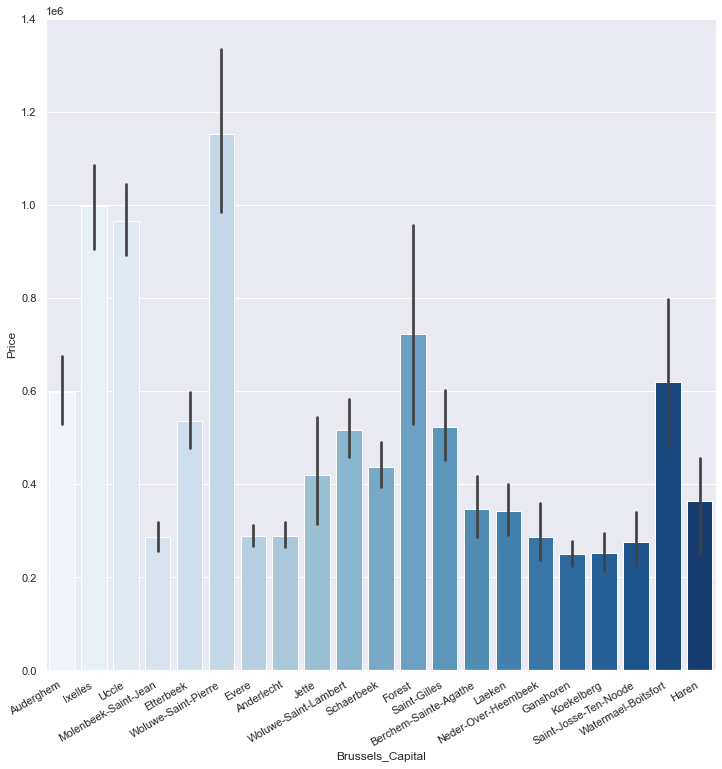

In [81]:
plt.figure(figsize=(12, 12))
chart = sns.barplot(x="city", y="price", data=brussels, palette="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment="right")
plt.xlabel("Brussels_Capital")
plt.ylabel("Price")
plt.savefig("brussels.png", bbox_inches="tight")

### price for different provinces of Flanders

In [86]:
flanders = ds[ds["region"] == "Flanders"]
flanders


,postal_code,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city,province,region
45,9890,HOUSE,MANSION,435000,5,452,0,0,0,0,None,1,None,460.0,4,0,TO_RENOVATE,Vurste,East_Flanders,Flanders
46,9890,HOUSE,HOUSE,285000,3,125,0,0,0,0,None,1,None,495.0,0,0,GOOD,Vurste,East_Flanders,Flanders
47,9890,HOUSE,HOUSE,310000,5,298,1,0,0,1,None,1,None,525.0,2,0,TO_RENOVATE,Vurste,East_Flanders,Flanders
48,9890,HOUSE,HOUSE,285000,2,115,0,0,0,0,None,0,None,211.0,3,0,GOOD,Vurste,East_Flanders,Flanders
49,9890,HOUSE,HOUSE,825000,0,650,0,1,1,0,None,1,150.0,724.0,0,0,No_information,Vurste,East_Flanders,Flanders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15638,3472,HOUSE,HOUSE,330000,3,182,0,0,0,0,None,0,None,2900.0,4,0,TO_RENOVATE,Kersbeek-Miskom,Flemish_Brabant,Flanders
15641,8582,APARTMENT,APARTMENT,245000,2,146,1,0,1,1,30.0,0,None,0.0,4,0,GOOD,Outrijve,West_Flanders,Flanders
15643,3381,HOUSE,HOUSE,215000,2,102,1,0,0,1,88.0,1,333.0,10000.0,4,0,TO_RENOVATE,Kapellen,Flemish_Brabant,Flanders
15647,9881,HOUSE,HOUSE,499000,6,274,1,0,0,0,None,1,None,1036.0,3,0,TO_RENOVATE,Bellem,East_Flanders,Flanders


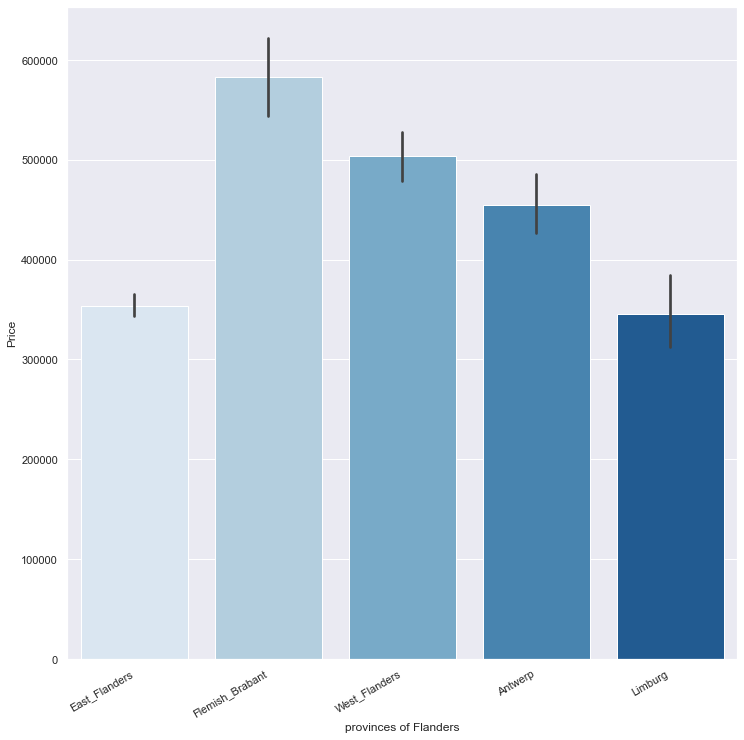

In [187]:
plt.figure(figsize=(12, 12))
chart = sns.barplot(x="province", y="price", data=flanders, palette="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment="right")
plt.xlabel("provinces of Flanders")
plt.ylabel("Price")
plt.savefig("flamande.png", bbox_inches="tight")

### price for different provinces of Wallonia

In [91]:
wallonia = ds[ds["region"] == "Wallonia"]
wallonia

,postal_code,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city,province,region
0,6800,HOUSE,HOUSE,295000,5,460,1,0,0,1,10.0,0,None,321.0,2,0,TO_BE_DONE_UP,Remagne,Luxembourg,Wallonia
1,6800,HOUSE,HOUSE,175000,3,172,0,0,0,1,None,1,1000.0,1254.0,4,0,TO_RENOVATE,Remagne,Luxembourg,Wallonia
2,6800,HOUSE,HOUSE,539000,5,596,1,0,1,1,38.0,1,1300.0,1500.0,4,0,AS_NEW,Remagne,Luxembourg,Wallonia
3,6800,APARTMENT,APARTMENT,154000,2,62,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
4,6800,APARTMENT,APARTMENT,179000,2,79,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15644,7812,HOUSE,HOUSE,220000,2,142,1,0,0,0,None,0,None,587.0,0,0,GOOD,Mainvault,Hainaut,Wallonia
15645,4557,HOUSE,HOUSE,259000,3,136,1,0,0,1,None,1,160.0,345.0,3,0,No_information,Seny,Liege,Wallonia
15646,4557,HOUSE,COUNTRY_COTTAGE,139000,2,81,1,0,0,0,None,1,350.0,443.0,3,0,TO_RENOVATE,Seny,Liege,Wallonia
15648,6851,HOUSE,HOUSE,115000,4,160,0,0,0,1,None,1,None,1555.0,4,0,TO_RENOVATE,Nollevaux,Luxembourg,Wallonia


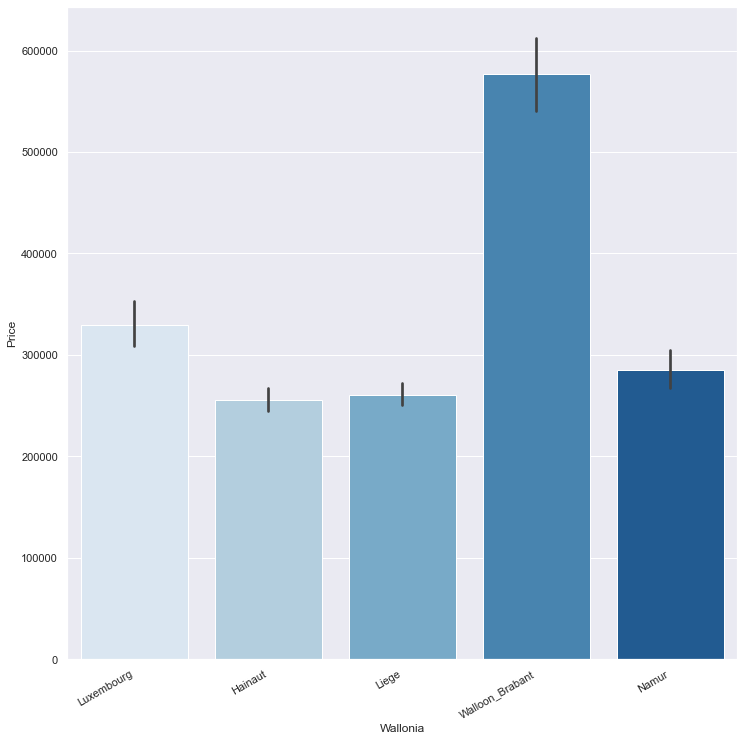

In [92]:
plt.figure(figsize=(12, 12))
chart = sns.barplot(x="province", y="price", data=wallonia, palette="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment="right")
plt.xlabel("Wallonia")
plt.ylabel("Price")
plt.savefig("wallone.png", bbox_inches="tight")

# price-area

In [93]:
ds['price'] .corr(ds['area'])

0.592531553754259

In [94]:
ds['price_area'] = ds['price'] / ds['area']


In [95]:
ds.head()

,postal_code,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city,province,region,price_area
0,6800,HOUSE,HOUSE,295000,5,460,1,0,0,1,...,0,None,321.0,2,0,TO_BE_DONE_UP,Remagne,Luxembourg,Wallonia,641.304348
1,6800,HOUSE,HOUSE,175000,3,172,0,0,0,1,...,1,1000.0,1254.0,4,0,TO_RENOVATE,Remagne,Luxembourg,Wallonia,1017.441860
2,6800,HOUSE,HOUSE,539000,5,596,1,0,1,1,...,1,1300.0,1500.0,4,0,AS_NEW,Remagne,Luxembourg,Wallonia,904.362416
3,6800,APARTMENT,APARTMENT,154000,2,62,0,0,0,1,...,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia,2483.870968
4,6800,APARTMENT,APARTMENT,179000,2,79,0,0,0,1,...,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia,2265.822785


In [101]:
d1=ds.groupby('postal_code')['price_area'].mean().sort_values(ascending=False).reset_index()
d1

,postal_code,price_area
0,8300,9231.132657
1,9831,6766.055046
2,3900,6250.000000
3,8301,5925.256315
4,1933,5478.156960
...,...,...
891,7622,629.921260
892,6460,550.000000
893,6671,441.666667
894,6698,370.370370


In [117]:
province_price = ds.groupby("province").price_area.agg(["mean"])

In [118]:
province_price.reset_index(level=0, inplace=True)
province_price


,province,mean
0,Antwerp,2552.718063
1,Brussels_Capital,3871.976250
2,East_Flanders,2274.023763
3,Flemish_Brabant,2838.366501
4,Hainaut,1480.674328
5,Liege,1731.821433
6,Limburg,2013.661039
7,Luxembourg,1735.248538
8,Namur,1785.324882
9,Walloon_Brabant,2817.474883


<AxesSubplot:xlabel='province'>

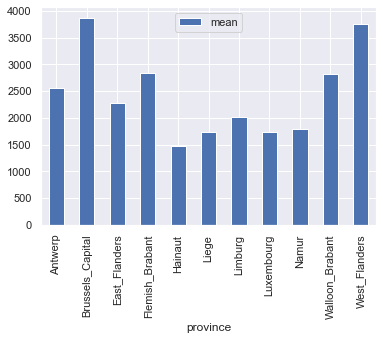

In [119]:
province_price.plot.bar(x = "province", y = "mean")

### less expensive communes in Belgium for price per m2

In [121]:
d=ds.groupby('postal_code')['price_area'].mean().sort_values(ascending=False)[-5:].reset_index()
d

,postal_code,price_area
0,7622,629.921260
1,6460,550.000000
2,6671,441.666667
3,6698,370.370370
4,4750,326.923077


Text(0, 0.5, 'price per m2')

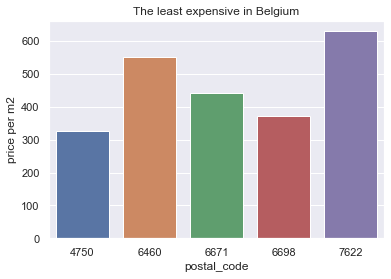

In [122]:

ax = sns.barplot(x='postal_code', y='price_area', data=d)
ax.set_title('The least expensive in Belgium')
ax.set_ylabel('price per m2')

In [124]:
d_1=ds.groupby('city')['price_area'].mean().sort_values(ascending=False)[-5:].reset_index()
d_1

,city,price_area
0,Laplaigne,629.921260
1,Salles,550.000000
2,Bovigny,441.666667
3,Grand-Halleux,370.370370
4,Elsenborn,326.923077


Text(0, 0.5, 'price per m2')

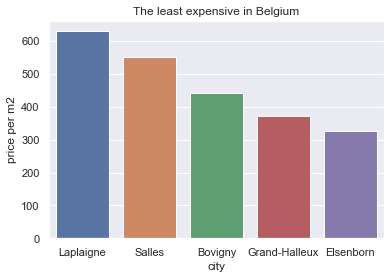

In [126]:
ax = sns.barplot(x='city', y='price_area', data=d_1)
ax.set_title('The least expensive in Belgium')
ax.set_ylabel('price per m2')

### most expensive communes in Belgium for price per m2

In [127]:
d_2=ds.groupby('city')['price_area'].mean().sort_values(ascending=False)[:5].reset_index()
d_2

,city,price_area
0,Knokke,9231.132657
1,Deurle,6766.055046
2,Overpelt,6250.000000
3,Ramskapelle,5925.256315
4,Sterrebeek,5478.156960


Text(0, 0.5, 'price per m2')

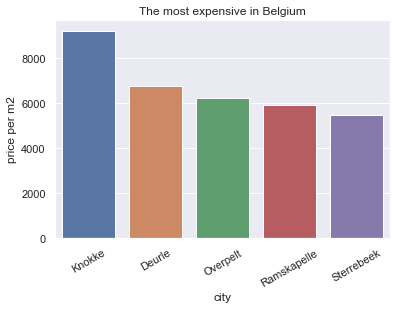

In [128]:
ax = sns.barplot(x='city', y='price_area', data=d_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The most expensive in Belgium')
ax.set_ylabel('price per m2')

In [130]:
data=ds.groupby('city')['price'].mean().sort_values(ascending=False)[-5:].reset_index()

Text(0, 0.5, 'Average of price')

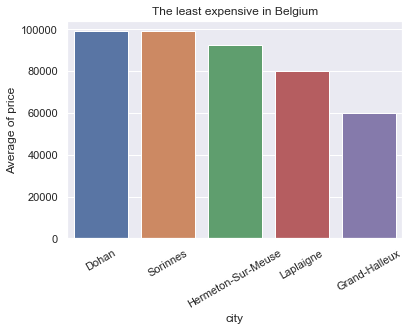

In [131]:
ax = sns.barplot(x='city', y='price', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The least expensive in Belgium')
ax.set_ylabel('Average of price')

In [132]:
data_1=ds.groupby('city')['price'].median().sort_values(ascending=False)[-5:].reset_index()

Text(0, 0.5, 'Median of price')

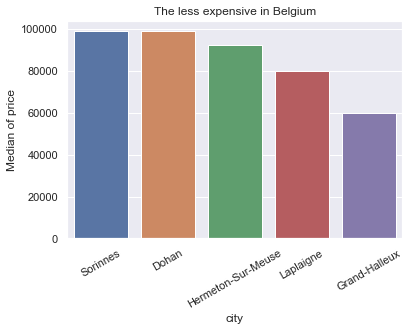

In [134]:
ax = sns.barplot(x='city', y='price', data=data_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The less expensive in Belgium')
ax.set_ylabel('Median of price')

### most expensive commune of Blegium Average price and median price

In [136]:
da=ds.groupby('city')['price'].median().sort_values(ascending=False)[:5].reset_index()

Text(0, 0.5, 'Median of price')

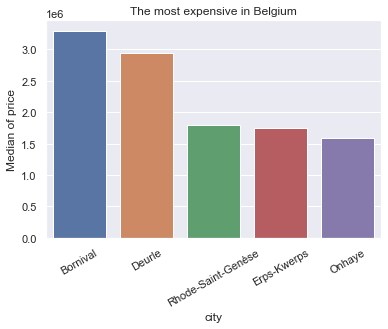

In [137]:
ax = sns.barplot(x='city', y='price', data=da)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The most expensive in Belgium')
ax.set_ylabel('Median of price')

In [138]:
da_1=ds.groupby('city')['price'].mean().sort_values(ascending=False)[:5].reset_index()

Text(0, 0.5, 'Average of price ')

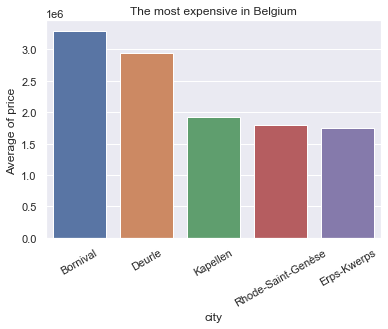

In [139]:
ax = sns.barplot(x='city', y='price', data=da_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The most expensive in Belgium')
ax.set_ylabel('Average of price ')

### most expensive commune in Flanders 

In [145]:
dat=ds[ds.region=='Flanders'].groupby('city')['price'].mean().sort_values(ascending=False)[:5].to_frame().reset_index()

Text(0, 0.5, 'Average of price')

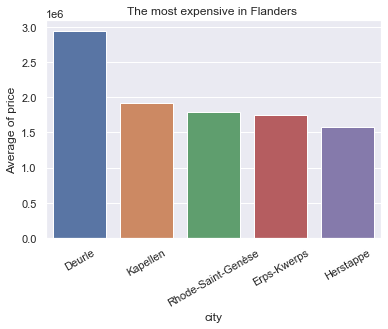

In [146]:

ax = sns.barplot(x='city', y='price', data=dat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The most expensive in Flanders ')
ax.set_ylabel('Average of price')

In [147]:
dat_1=ds[ds.region=='Flanders'].groupby('city')['price'].median().sort_values(ascending=False)[:5].to_frame().reset_index()

Text(0, 0.5, 'median of price')

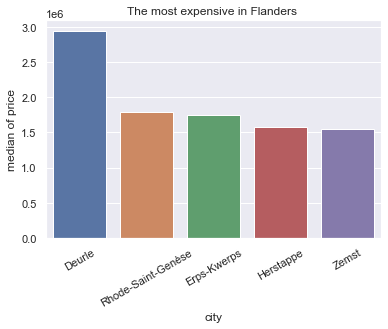

In [148]:
ax = sns.barplot(x='city', y='price', data=dat_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The most expensive in Flanders ')
ax.set_ylabel('median of price')

In [149]:
dat_2=ds[ds.region=='Flanders'].groupby('city')['price_area'].mean().sort_values(ascending=False)[:5].to_frame().reset_index()

Text(0, 0.5, 'price per m2')

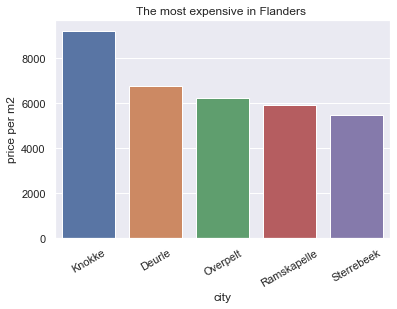

In [150]:
ax = sns.barplot(x='city', y='price_area', data=dat_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The most expensive in Flanders ')
ax.set_ylabel('price per m2')

### less expensive commune in Flanders

In [151]:
dat_3=ds[ds.region=='Flanders'].groupby('city')['price_area'].mean().sort_values(ascending=False)[-5:].to_frame().reset_index()

Text(0, 0.5, 'price per m2')

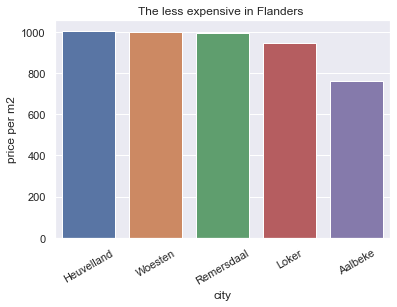

In [152]:
ax = sns.barplot(x='city', y='price_area', data=dat_3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The less expensive in Flanders ')
ax.set_ylabel('price per m2')

In [190]:
dat_4=ds[ds.region=='Flanders'].groupby('city')['price'].mean().sort_values(ascending=False)[-5:].to_frame().reset_index()

Text(0, 0.5, 'Average of price')

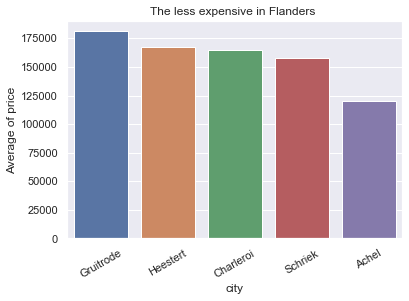

In [191]:
ax = sns.barplot(x='city', y='price', data=dat_4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The less expensive in Flanders ')
ax.set_ylabel('Average of price')

In [192]:
dat_5=ds[ds.region=='Flanders'].groupby('city')['price'].median().sort_values(ascending=False)[-5:].to_frame().reset_index()

Text(0, 0.5, 'median of price')

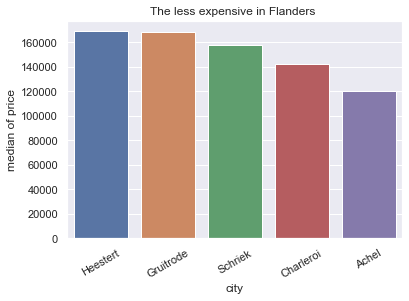

In [193]:
ax = sns.barplot(x='city', y='price', data=dat_5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The less expensive in Flanders ')
ax.set_ylabel('median of price')

### Most expensive communes in wallonia.

In [174]:
#most expensive Average
data=ds[ds.region=='Wallonia'].groupby('city')['price'].mean().sort_values(ascending=False)[:5].to_frame().reset_index()

Text(0, 0.5, 'Average of price')

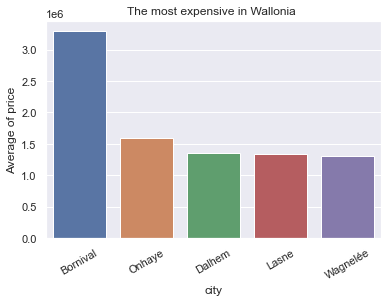

In [175]:
ax = sns.barplot(x='city', y='price', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The most expensive in Wallonia ')
ax.set_ylabel('Average of price')

In [176]:
# most expensive price per m2
data_2=ds[ds.region=='Wallonia'].groupby('city')['price_area'].mean().sort_values(ascending=False)[:5].to_frame().reset_index()
data_2

,city,price_area
0,Bornival,4400.000000
1,Dalhem,3958.944282
2,Lasne,3716.652173
3,Louvain-La-Neuve,3584.889352
4,Soiron,3500.000000


Text(0, 0.5, 'price per m2')

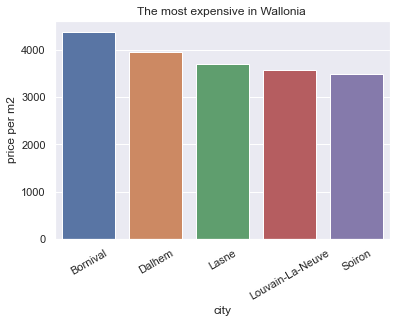

In [177]:
ax = sns.barplot(x='city', y='price_area', data=data_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The most expensive in Wallonia ')
ax.set_ylabel('price per m2')


In [178]:
data_3=ds[ds.region=='Wallonia'].groupby('city')['price'].median().sort_values(ascending=False)[:5].to_frame().reset_index()
data_3

,city,price
0,Bornival,3300000.0
1,Onhaye,1595000.0
2,Dalhem,1350000.0
3,Wagnelée,1300000.0
4,Moresnet,1275000.0


Text(0, 0.5, 'Median of price')

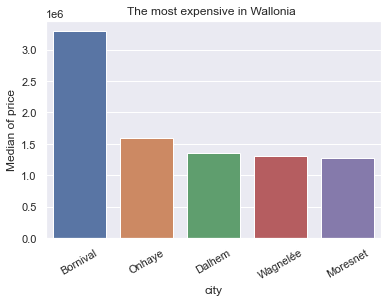

In [179]:
ax = sns.barplot(x='city', y='price', data=data_3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The most expensive in Wallonia ')
ax.set_ylabel('Median of price')

### less expensive communes in Wallonia.

In [180]:
dataa_1=ds[ds.region=='Wallonia'].groupby('city')['price'].mean().sort_values(ascending=False)[-5:].to_frame().reset_index()
dataa_1

,city,price
0,Dohan,99000.0
1,Sorinnes,99000.0
2,Hermeton-Sur-Meuse,92500.0
3,Laplaigne,80000.0
4,Grand-Halleux,60000.0


Text(0, 0.5, 'Mean of price')

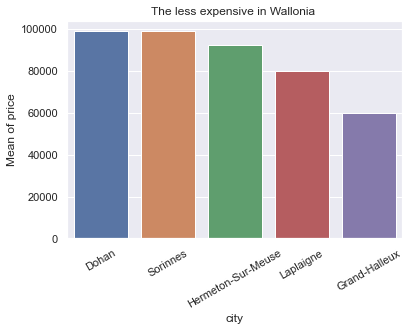

In [181]:
ax = sns.barplot(x='city', y='price', data=dataa_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The less expensive in Wallonia ')
ax.set_ylabel('Mean of price')

In [182]:
dataa_2=ds[ds.region=='Wallonia'].groupby('city')['price'].median().sort_values(ascending=False)[-5:].to_frame().reset_index()
dataa_2

,city,price
0,Dohan,99000.0
1,Sorinnes,99000.0
2,Hermeton-Sur-Meuse,92500.0
3,Laplaigne,80000.0
4,Grand-Halleux,60000.0


Text(0, 0.5, 'Median of price')

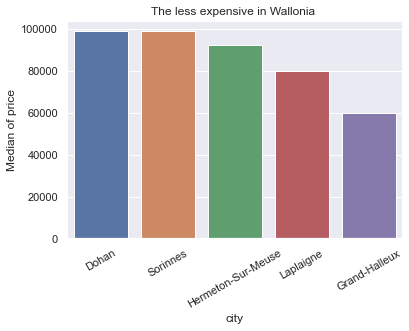

In [183]:
ax = sns.barplot(x='city', y='price', data=dataa_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The less expensive in Wallonia ')
ax.set_ylabel('Median of price')

In [184]:
dataa_3=ds[ds.region=='Wallonia'].groupby('city')['price_area'].mean().sort_values(ascending=False)[-5:].to_frame().reset_index()
dataa_3

,city,price_area
0,Laplaigne,629.921260
1,Salles,550.000000
2,Bovigny,441.666667
3,Grand-Halleux,370.370370
4,Elsenborn,326.923077


Text(0, 0.5, 'price per m2')

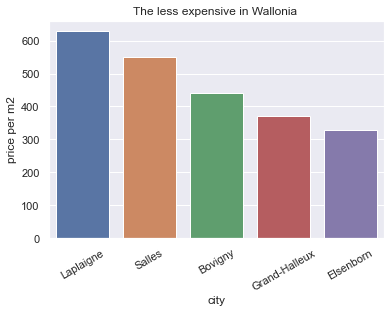

In [186]:
ax = sns.barplot(x='city', y='price_area', data=dataa_3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('The less expensive in Wallonia ')
ax.set_ylabel('price per m2')